# Mushroom Classification - Decision Trees

## Import Libraries

In [1]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import matplotlib.image as pltimg

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

## Data Acquisition and Cleaning

In [2]:
# loading the data from csv file to a Pandas Dataframe
# print first 5 rows of the dataframe

import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_ec2d60ba0656445ba4ab0c771aa5f2ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vnwRz3ZFcmgsKQJ_byRrvv6-OTGEXJVuaxUCh7ds8ngN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ec2d60ba0656445ba4ab0c771aa5f2ad)

body = client_ec2d60ba0656445ba4ab0c771aa5f2ad.get_object(Bucket='projectingithub-donotdelete-pr-fxoalfetgg9jat',Key='mushrooms.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mushroom_data = pd.read_csv(body)
mushroom_data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# the number of rows and columns
mushroom_data.shape

(8124, 23)

In [4]:
# getting some information about the dataset
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Checking for missing values
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Data Analysis

In [6]:
# Statistical Measures of the Dataset
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


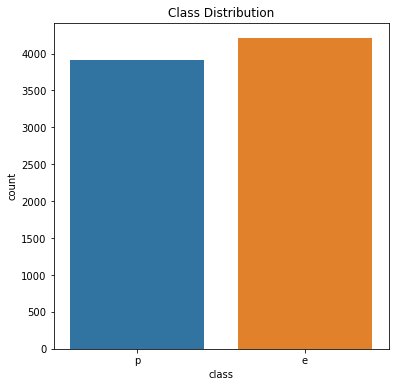

In [7]:
# Class column
plt.figure(figsize=(6,6))
sns.countplot(x='class',data=mushroom_data)
plt.title('Class Distribution')
plt.show()

In [8]:
mushroom_data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

"e" = edible

"p" = poisonous

### Data Pre-processing

Separate the target and features columns.

In [9]:
x = mushroom_data.drop(columns='class',axis=1)
y = mushroom_data['class']

In [67]:
print(x['habitat'].unique())

['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [11]:
print(y)

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object


In [12]:
# force all fields in the input data to be string, just in case Pandas tried to map some automatically to numbers
x = x.astype(str)

### Split into training set and Test set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (6499, 22) (6499,)
Test (1625, 22) (1625,)


In [104]:
# prepare input data

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [98]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [105]:
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

## Feature Selection


In [18]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 14.100028
Feature 1: 183.929983
Feature 2: 13.830041
Feature 3: 939.892874
Feature 4: 73.768324
Feature 5: 2.471340
Feature 6: 701.359713
Feature 7: 1282.950367
Feature 8: 4747.903973
Feature 9: 30.456485
Feature 10: 909.203203
Feature 11: 179.667702
Feature 12: 161.587612
Feature 13: 98.871111
Feature 14: 92.051434
Feature 15: nan
Feature 16: 3.751978
Feature 17: 22.045196
Feature 18: 1549.187451
Feature 19: 288.027937
Feature 20: 249.676829
Feature 21: 636.580987


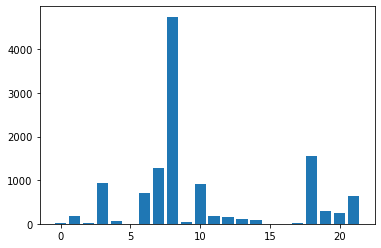

In [19]:
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train_enc, y_train_enc, x_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Looking at the values, perhaps Features 3, 6, 7, 8, 10, 18, and 21 are most relevant.

## Model built using the Chi-Squared Features
We can use the chi-squared test to score the features and select the seven most relevant features.

In [23]:
def select_features_fin(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=7)
    fs.fit(X_train, y_train)
    cn = pd.DataFrame(x.columns[(fs.get_support())])
    X_train_fs = fs.transform(X_train) # reduce X_train to the selected features
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, cn

In [24]:
# feature selection
x_train_fs, x_test_fs, cn = select_features_fin(x_train_enc, y_train_enc, x_test_enc)

# print the names of the features that is relevant
print(cn)

              0
0       bruises
1  gill-spacing
2     gill-size
3    gill-color
4    stalk-root
5     ring-type
6       habitat


For this instance, the target variable "e" is encoded as 0 and "p" as 1.

The features are encoded as follows:
- "bruises" = "f":0, "t":1
- "gill-spacing" = "c":0, "w":1
- "gill-size" = "b":0, "n":1
- "gill-color" = 'b':0, 'e':1, 'g':2, 'h':3, 'k':4, 'n':5, 'o':6, 'p':7, 'r':8, 'u':9, 'w':10, 'y':11
- "stalk-root" = '?':0, 'b':1, 'c':2, 'e':3, 'r':4
- "ring-type" = 'e':0, 'l':2, 'f':1, 'n':3, 'p':4
- "habitat" = 'd':0,'g':1, 'l':2, 'm':3, 'p':4, 'u':5, 'w':6


In [25]:
# splitting the original dataset to features and target based on feature selection

features = ['bruises','gill-spacing','gill-size','gill-color','stalk-root','ring-type','habitat']
X = mushroom_data[features]
Y = mushroom_data['class']

In [26]:
# splitting to training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=3)

In [27]:
# summarize
print('Train', X_train.shape, Y_train.shape)
print('Test', X_test.shape, Y_test.shape)

Train (6499, 7) (6499,)
Test (1625, 7) (1625,)


In [28]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
Y_train_enc, Y_test_enc = prepare_targets(Y_train, Y_test)

## Fit the Model

In [29]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree = dtree.fit(X_train_enc, Y_train_enc)
predictions = dtree.predict(X_test_enc)

## Evaluating the Model

In [30]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Score of Test data:",metrics.accuracy_score(Y_test_enc, predictions))

Accuracy Score of Test data: 1.0


In [31]:
# evaluating the training model

y_preds = dtree.predict(X_train_enc)
print("Accuracy Score of Training data:",metrics.accuracy_score(Y_train_enc, y_preds))

Accuracy Score of Training data: 1.0


### Visualizing the Decision Trees

In [33]:
pip install pydotplus

     |████████████████████████████████| 278 kB 10.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=a79170eed41f3067d22408be5a3100eee5210f2509639104acefddc9f2319981
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


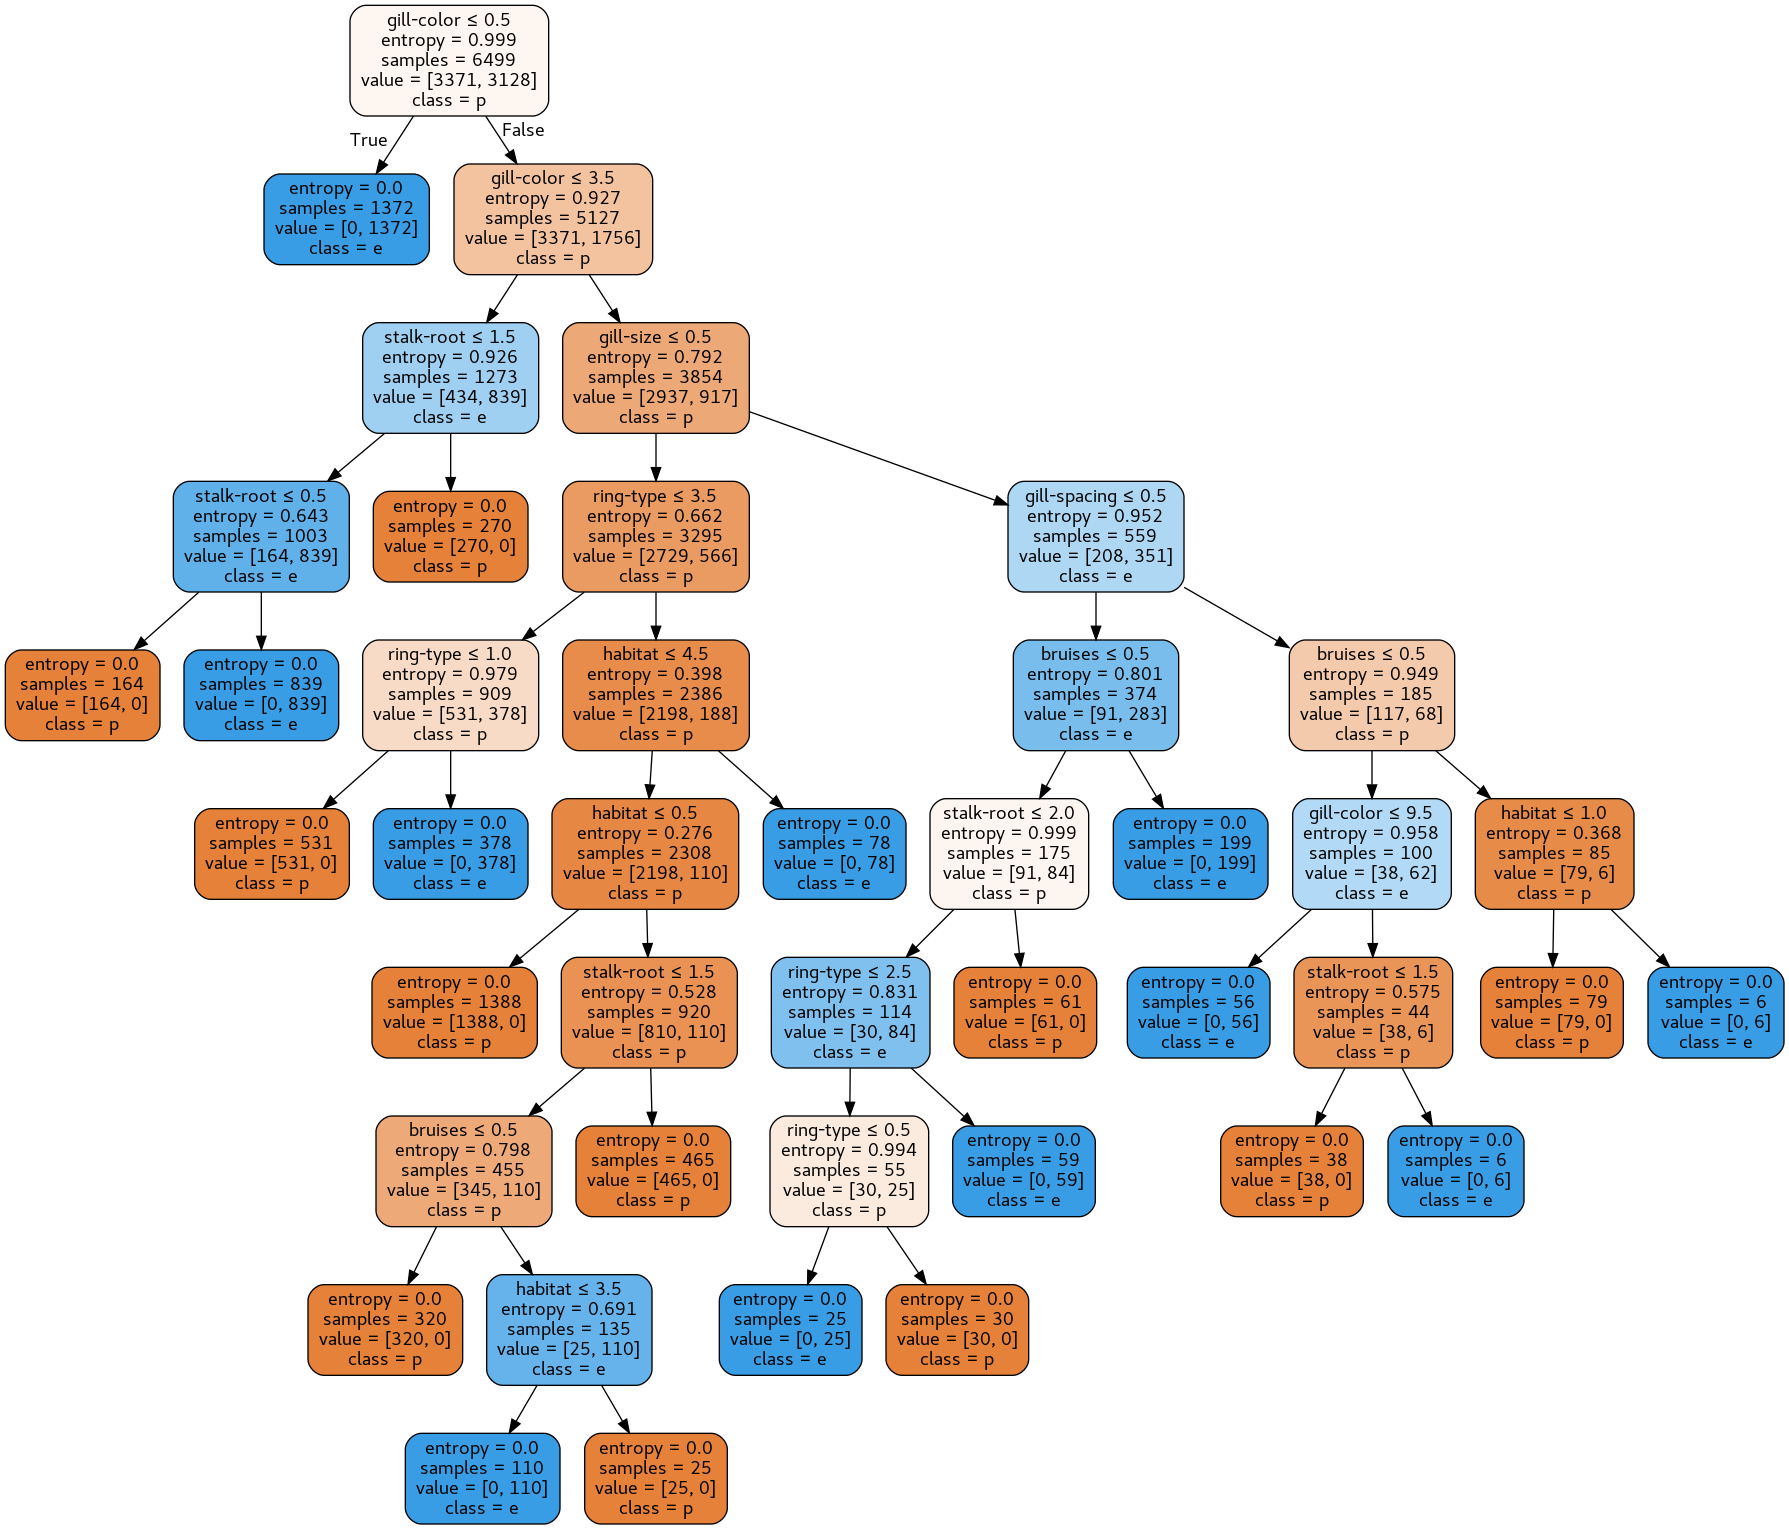

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['p','e'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mushroom.png')
Image(graph.create_png())

### Pruning by giving max depth

In [35]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train_enc,Y_train_enc)

#Predict the response for test dataset
Y_pred = clf.predict(X_test_enc)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Score of Test data:",metrics.accuracy_score(Y_test_enc, Y_pred))

Accuracy Score of Test data: 0.8609230769230769


In [36]:
y_pred = clf.predict(X_train_enc)
print("Accuracy Score of Training data:",metrics.accuracy_score(Y_train_enc, y_pred))

Accuracy Score of Training data: 0.8556701030927835


The accuracy of the model decreased when there are only 3 branches!

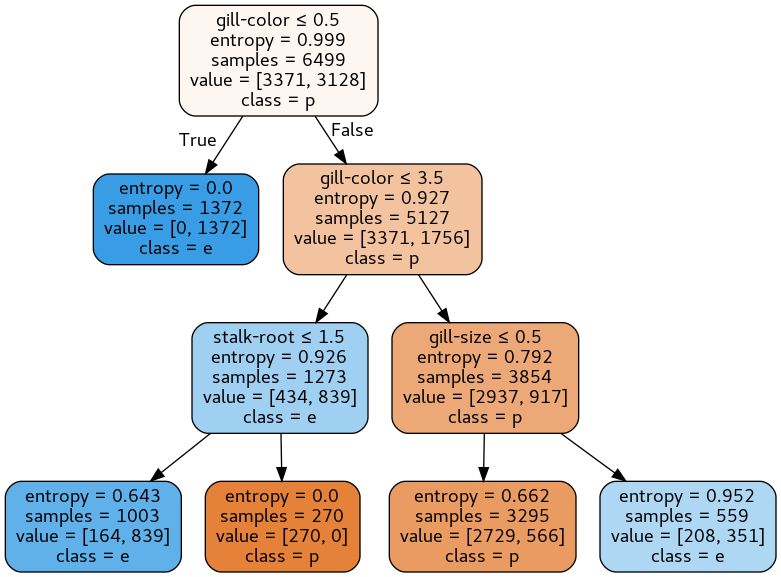

In [37]:
# Visualizing the Prune

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['p','e'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mushroom.png')
Image(graph.create_png())

In [38]:
# make a function that calculates the accuracy of the train and test data when max depth increases.


def diff_depth_train(a):
    ddt = DecisionTreeClassifier(criterion="entropy", max_depth=a)
    ddt = ddt.fit(X_train_enc,Y_train_enc)
    prediction = ddt.predict(X_train_enc)
    return(metrics.accuracy_score(Y_train_enc, prediction))

def diff_depth_test(b):
    dpt = DecisionTreeClassifier(criterion="entropy", max_depth=b)
    dpt = dpt.fit(X_train_enc, Y_train_enc)
    predictions = dpt.predict(X_test_enc)
    return(metrics.accuracy_score(Y_test_enc, predictions))

In [39]:
num = range(1,10)
accuracy_score_train = []
for i in num:
    train_score = diff_depth_train(i)
    accuracy_score_train.append(train_score)

accuracy_score_test = []
for i in num:
    test_score = diff_depth_test(i)
    accuracy_score_test.append(test_score)
    
df = pd.DataFrame(list(zip(num, accuracy_score_train, accuracy_score_test)),
                 columns=['Max Depth','Train','Test'])
df

,Max Depth,Train,Test
0,1,0.729805,0.734154
1,2,0.792122,0.782769
2,3,0.855670,0.860923
3,4,0.888444,0.889846
4,5,0.963379,0.959385
5,6,0.977535,0.974154
6,7,0.979228,0.974769
7,8,0.996153,0.995692
8,9,1.000000,1.000000


## Build a Predictive System

In [109]:
# get one row from the original dataset. Make sure that it only contains values included in the features.
# We can check to see if the prediction is correct as the original dataset already classified the mushrooms as "e" or "p".
# input_data_orig = ()

# the input data needs to include only the 7 features selected and encoded.
input_data = (1,0,0,10,2,4,1)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction1 = dtree.predict(input_data_reshaped)
print(prediction1)

if prediction1 == 0:
    print("The mushroom is edible without pruning")
else:
    print("The mushroom is poisonous without pruning")
    
prediction2 = clf.predict(input_data_reshaped)
print(prediction2)

if prediction2 == 0:
    print("The mushroom is edible after pruning")
else:
    print("The mushroom is poisonous after pruning")

[0]
The mushroom is edible without pruning
[0]
The mushroom is edible after pruning
